<a href="https://colab.research.google.com/github/abrilalmeida/coderproject/blob/main/ProyectoDSParteIAbrilAlmeida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Video Game Sales and Ratings (dataset de kaggle)
#Este dataset contiene una lista de video juegos con mas de 100.000 copias vendidas hasta el 2017 junto con sus calificaciones de los usuarios.
#El dataset sirve de mecanismo para analizar tendencias en la industria de los video juegos haciendo más fácil la observación de dinámicas del mercado, popularidad de los géneros de video juegos y preferencias por región.
#Hipótesis 1: Los juegos del género de acción generan un numero de ventas globales mucho mayor que los de los otros géneros.
#Hipótesis 2: Los usuarios en la región de Japón (JP) prefieren juegos de roll (RPGs), mientras que los usuarios Norteamericanos (NA) prefieren juegos de deporte o de acción.

#Preguntas:
#•	¿Qué diferencias hay entre las ventas por region?
#•	¿Qué géneros son los más rentables en las ventas globales?
#•	¿Cómo cambia el interés del usuario en distintos géneros a lo largo del tiempo?
#•	¿Cuánto impacta la plataforma en la que se lanzan los juegos en términos de ventas globales?



In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/abrilalmeida/coderproject/refs/heads/main/Video_Game_Sales_as_of_Jan_2017.csv")

In [ ]:
print(df.head())

                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue        G           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.54          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.80      3.79         3.29         35.57          82.0   
3     15.61     10.95      3.28         2.95         32.78          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count  User_Score  User_Count Rating  
0      

#Se detectaron valores perdidos para las columnas "Year_of_Release", "Publisher", "Critic_Score", "Critic_count", "User_Score", "User_Count" y "Rating".

In [ ]:
valores_perdidos = df.isnull().sum()
print(valores_perdidos)

Name                  0
Platform              0
Year_of_Release       8
Genre                 0
Publisher             1
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       9080
Critic_Count       9080
User_Score         9618
User_Count         9618
Rating             7164
dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = df.dropna()

#Grafico de ventas globales por genero y por plataforma
#Se observa que el género "Action" lidera las ventas en varias plataformas, especialmente en PS2 y X360. El género "Sports" también tiene un peso importante, principalmente en PS2 y Wii.

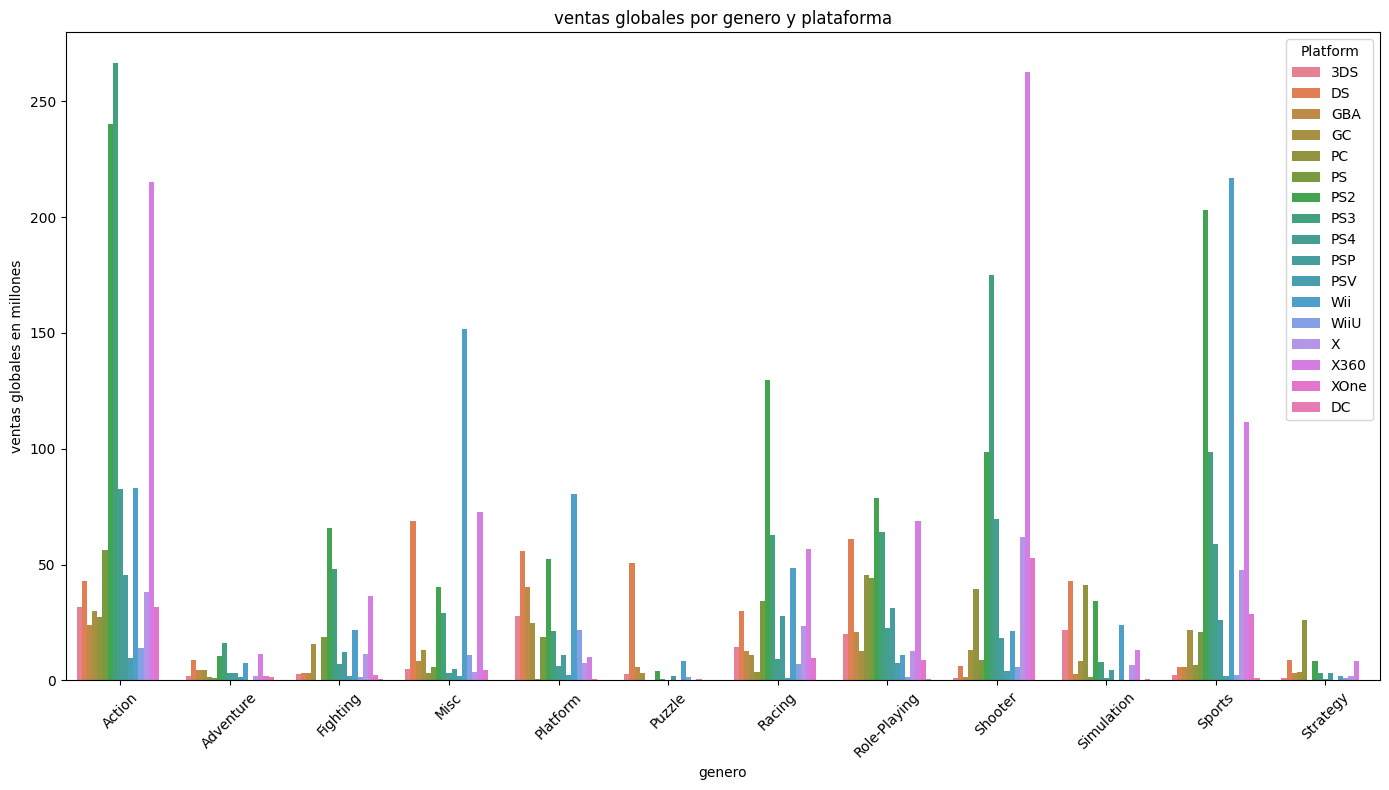

In [ ]:
filtro1 = df.groupby(["Genre", "Platform"])["Global_Sales"].sum().reset_index()

plt.figure(figsize=(14,8))
sns.barplot(data=filtro1, x="Genre", y="Global_Sales", hue="Platform")
plt.xlabel("genero")
plt.ylabel("ventas globales en millones")
plt.title("ventas globales por genero y plataforma")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Grafico de ventas globales por año segun el genero
#El interés en los géneros "Shooter" y "Action" ha ido creciendo desde 2005, mientras que los géneros "Platform" y "Puzzle" muestran una caída en ventas a lo largo de los años.

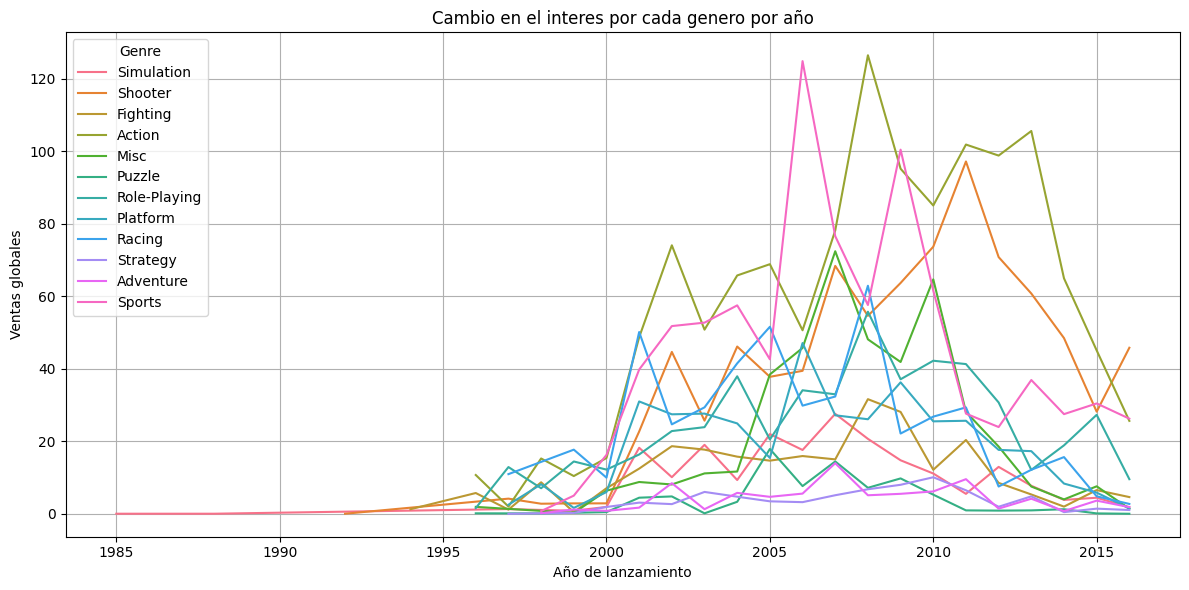

In [ ]:

genero_año_ventas = df.groupby(["Year_of_Release", "Genre"])["Global_Sales"].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x="Year_of_Release", y= "Global_Sales",hue= "Genre", data= genero_año_ventas )
plt.xlabel("Año de lanzamiento")
plt.ylabel("Ventas globales")
plt.title("Cambio en el interes por cada genero por año")
plt.grid(True)
plt.tight_layout()
plt.show()


#Grafico del total de ventas globales por genero
#Se observa que el genero con mas ventas globales es el de "Action" seguido de los generos "Sports" y "Shooter". Lo que los hace los géneros más rentables.

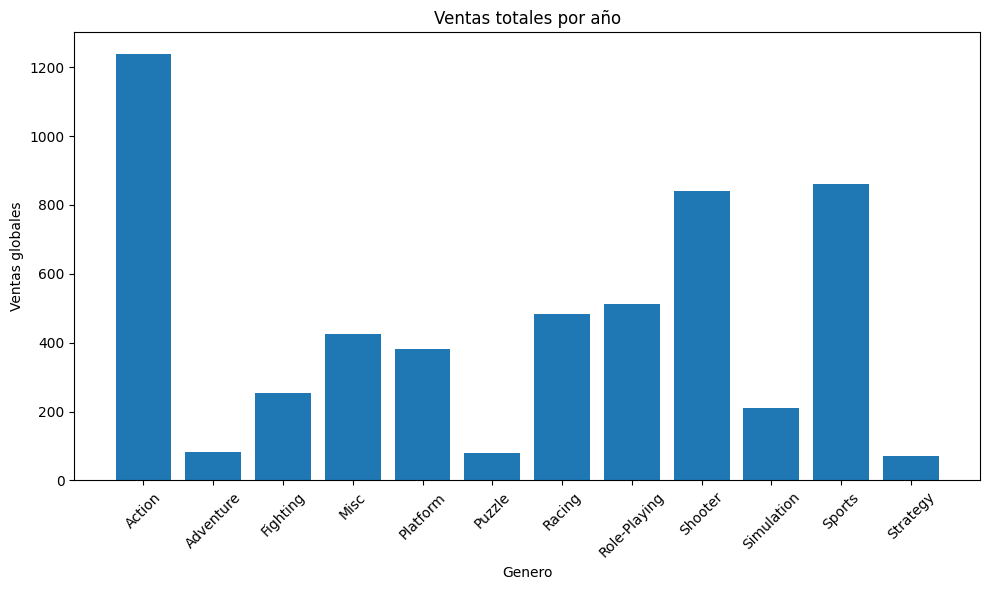

In [ ]:
ventas_x_genero = df.groupby("Genre")["Global_Sales"].sum()


plt.figure(figsize=(10, 6))
plt.bar(ventas_x_genero.index, ventas_x_genero.values )
plt.title("Ventas totales por año")
plt.xlabel("Genero")
plt.ylabel("Ventas globales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Ventas globales totales por año
#Las ventas globales comienzan a decaer alrederor de 2008.

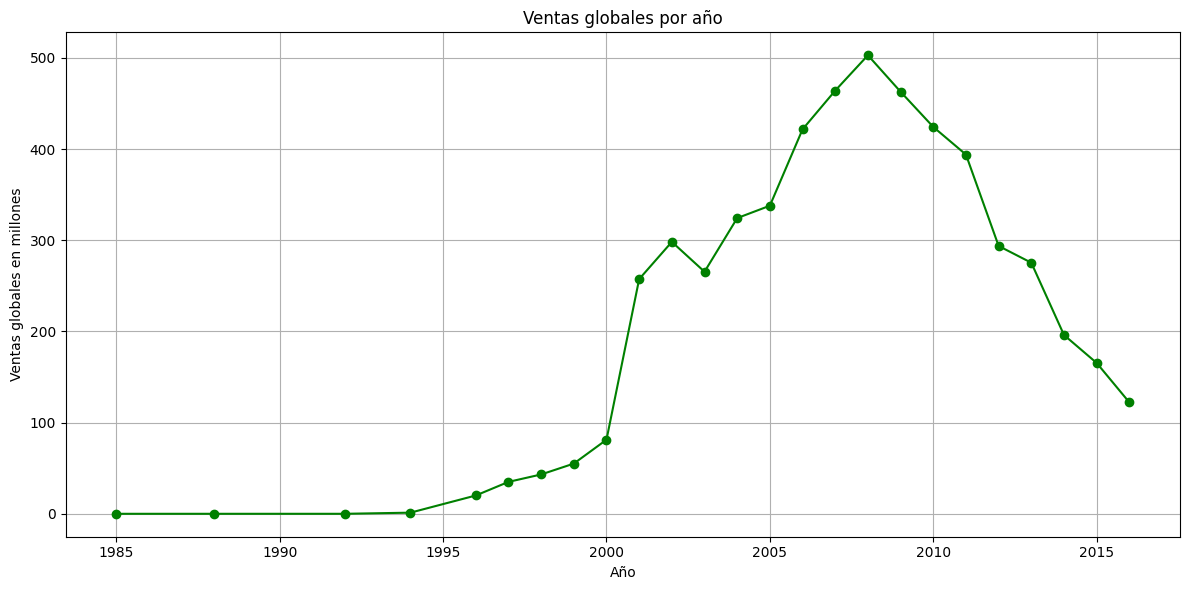

In [ ]:
ventas_años = df.groupby("Year_of_Release")["Global_Sales"].sum()

plt.figure(figsize=(12,6))
plt.plot(ventas_años.index, ventas_años.values, marker="o", color="green")
plt.xlabel("Año")
plt.ylabel("Ventas globales en millones")
plt.title("Ventas globales por año")
plt.grid(True)
plt.tight_layout()
plt.show()

#Comparación de ventas por región
#Aquí podemos observar que la región con mayor número de ventas es "Norteamerica" seguida de "Europa".


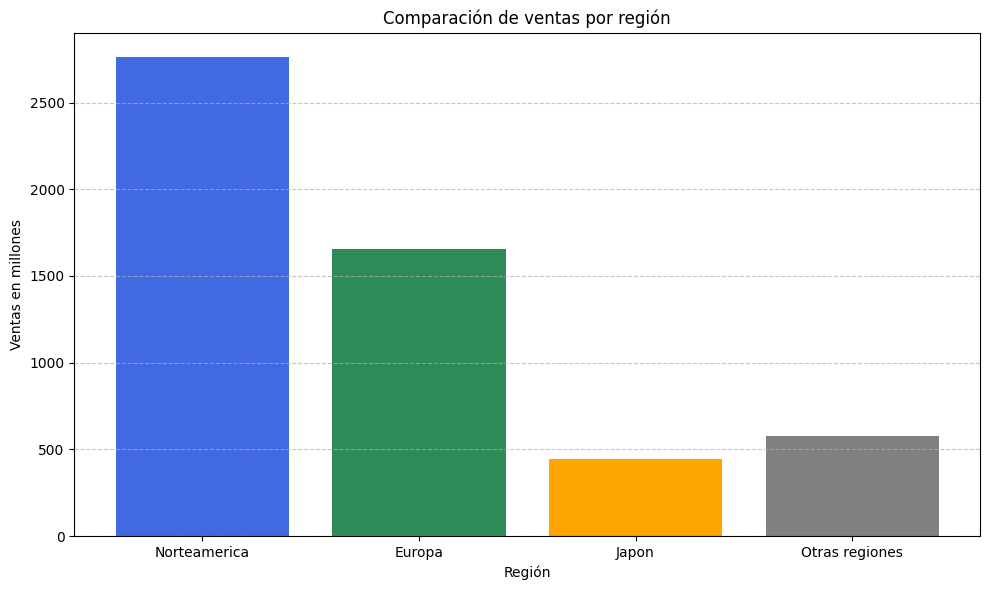

In [ ]:
ventas_x_region = {
    "Norteamerica":df['NA_Sales'].sum(),
    "Europa": df['EU_Sales'].sum(),
    "Japon":df['JP_Sales'].sum(),
    "Otras regiones":df['Other_Sales'].sum()
}

plt.figure(figsize=(10,6))
plt.bar(ventas_x_region.keys(), ventas_x_region.values(), color=["royalblue","seagreen", "orange","gray"])
plt.xlabel("Región")
plt.ylabel("Ventas en millones")
plt.title("Comparación de ventas por región")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

#Preferencias de género por región (Japón Vs Norteamérica)
#Se puede observar que el género que más llama la atención de los clientes Norteamericanos es el de "Action" y el que llama la atención de los clientes Japoneses es "Role-playing".

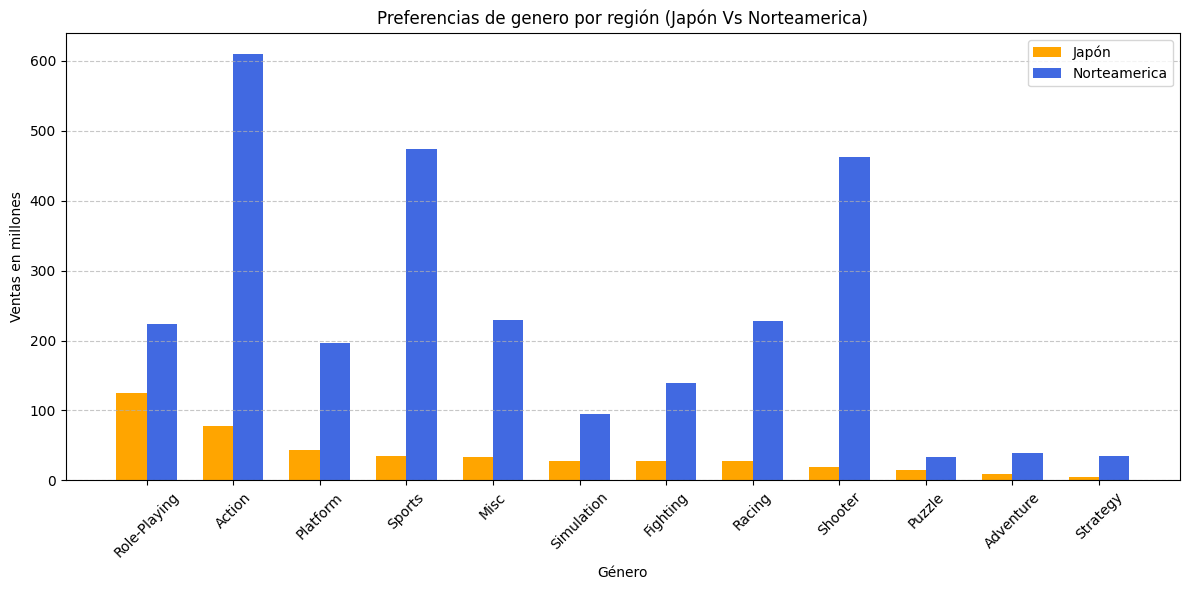

In [ ]:
agrupacion_x_region = df.groupby("Genre")[["JP_Sales","NA_Sales"]].sum().reset_index()

agrupacion_x_region_sorted = agrupacion_x_region.sort_values(["JP_Sales","NA_Sales"], ascending=False)

x = np.arange(len(agrupacion_x_region_sorted["Genre"]))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, agrupacion_x_region_sorted["JP_Sales"], width, label="Japón", color="orange")
plt.bar(x + width/2, agrupacion_x_region_sorted["NA_Sales"], width, label="Norteamerica", color="royalblue")

plt.xticks(x, agrupacion_x_region_sorted["Genre"], rotation=45)
plt.xlabel("Género")
plt.ylabel("Ventas en millones")
plt.title("Preferencias de genero por región (Japón Vs Norteamerica)")
plt.legend()
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

#Entrenamiento del algoritmo de regresión

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df = df.drop(columns=['Name'])

In [ ]:
y = df['Global_Sales']
x = df.drop("Global_Sales", axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

In [ ]:
x_test = x_test.reindex(columns=x_train.columns, fill_value=0)

In [ ]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

print("Media x_train escalado:", x_train_scaled.mean(axis=0))
print("STD x_train escalado:", x_train_scaled.std(axis=0))
print("Media x_test escalado:", x_test_scaled.mean(axis=0))
print("STD x_test escalado:", x_test_scaled.std(axis=0))

Media x_train escalado: [-2.38698145e-14  3.43468540e-18  1.93591359e-17 -3.24733892e-17
 -1.37387416e-17 -1.73607735e-16  2.99754362e-17  1.17403792e-16
  1.12407886e-17  2.49795302e-17 -1.24897651e-18  4.12162248e-17
 -2.87264597e-17 -3.74692953e-18  0.00000000e+00  2.93509480e-17
 -4.05917365e-17 -1.93591359e-17 -2.74774832e-17  6.49467784e-17
 -4.18407130e-17 -9.11752851e-17  3.74692953e-18  2.49795302e-17
 -3.74692953e-18 -1.24897651e-17 -3.93427600e-17 -3.74692953e-18
 -6.74447315e-17  2.49795302e-18  9.05507969e-17 -4.49631543e-17
 -5.05835486e-17 -5.37059899e-17 -2.87264597e-17  1.24897651e-17
  1.34264975e-17  4.34019337e-17 -3.74692953e-18  8.74283556e-18
 -1.37387416e-17  3.74692953e-18  3.74692953e-18  4.99590603e-18
  3.74692953e-18 -1.24897651e-18  3.74692953e-18 -1.24897651e-18
 -1.24897651e-18 -2.24815772e-17 -1.24897651e-18 -7.49385905e-18
  3.74692953e-18  4.99590603e-18 -4.99590603e-18  4.99590603e-18
  3.74692953e-18 -7.49385905e-18 -8.74283556e-18  2.49795302e-18
 

In [ ]:
modelolr = LinearRegression()
modelolr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = modelolr.predict(x_test)

In [ ]:
print("Mean squared error: ", mean_squared_error(y_test, y_pred))
print("R2 score: ", r2_score(y_test, y_pred))

Mean squared error:  3.743196224765814e-05
R2 score:  0.9999839864872785


#Conclusiones de las Hipótesis

#Hipótesis 1: En el gráfico "total de ventas por genero" se observa que el genero con más ventas globales es el de "Action" lo que hace a esta hipótesis correcta.

#Hipótesis 2: Esta hipótesis se demuestra correcta al ver el gráfico "Preferencias de género por región (Japón Vs Norteamérica)" que indica que el género que más llama la atención de los clientes Norteamericanos es el de "Action" mientras que el que llama la atención de los clientes Japoneses es "Role-playing".